<a href="https://colab.research.google.com/github/brayanricardo13/Analisis-Econometrico/blob/main/FIN_Y_FTC_Casa_de_Bolsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap

In [2]:
from google.colab import files
# Subir múltiples archivos
uploaded = files.upload()

Saving Valor de la Unidad.xlsx to Valor de la Unidad.xlsx


# **Cargar datos**

In [3]:
FIN = pd.read_excel("/content/Valor de la Unidad.xlsx", sheet_name="FIN")

In [4]:
FTC = pd.read_excel("/content/Valor de la Unidad.xlsx", sheet_name="FTC")

In [5]:
FIN['Fecha'] = pd.to_datetime(FIN['Fecha'])
FTC['Fecha'] = pd.to_datetime(FTC['Fecha'])

In [6]:
FIN.set_index('Fecha', inplace=True)
FTC.set_index('Fecha', inplace=True)

In [7]:
FIN.head()

,Valor Fondo,Valor Unidad,Unidades en Circulación,Rendimientos,Comisión Fija,Comisión Exito,Retención,Factor Retenc.,Rentab Diaria,Rentab Bruta,Rent Mes Eje Izq,Suscrip tores,Total Aperturas,Total Adiciones,Total Retiros,Imp. Retiros,Total Cancel,Imp. Cancel,Total NC,Total ND
Fecha,,,,,,,,,,,,,,,,,,,,
2023-04-27,4.075393e+07,1000.00,40753.93,0.00,0.00,0,0,0,0.00,0.00,0.0,1,40753930,0.000000e+00,0.0,0,0,0,0,0
2023-04-28,2.081243e+10,988.22,21060439.60,-479922.23,390.11,0,0,0,-0.99,-0.99,0.0,1,0,2.077216e+10,0.0,0,0,0,0,0
2023-04-29,2.082169e+10,988.66,21060439.60,9256151.44,199223.76,0,0,0,0.18,0.18,0.0,1,0,0.000000e+00,0.0,0,0,0,0,0
2023-04-30,2.083098e+10,989.10,21060439.60,9298926.12,199312.36,0,0,0,0.18,0.18,0.0,1,0,0.000000e+00,0.0,0,0,0,0,0
2023-05-01,2.084028e+10,989.55,21060439.60,9297320.57,199401.38,0,0,0,0.18,0.18,0.0,1,0,0.000000e+00,0.0,0,0,0,0,0


In [8]:
FTC.head()

,Valor Fondo,Valor Unidad,Unidades en Circulación,Rendimientos,Comisión Fija,Comisión Exito,Retención,Factor Retenc.,Rentab Diaria,Rentab Bruta,Rent Mes Eje Izq,Suscrip tores,Total Aperturas,Total Adiciones,Total Retiros,Imp. Retiros,Total Cancel,Imp. Cancel,Total NC,Total ND
Fecha,,,,,,,,,,,,,,,,,,,,
2023-04-27,2.833568e+07,1000.00,28335.69,0.00,0.00,0,0,0,0.00,0.00,0.0,1,28335685,0.000000e+00,0.0,0,0,0,0,0
2023-04-28,1.403352e+10,988.22,14200745.04,-333683.78,271.24,0,0,0,-0.99,-0.99,0.0,1,0,1.400551e+10,0.0,0,0,0,0,0
2023-04-29,1.403921e+10,988.62,14200745.04,5690237.51,134333.66,0,0,0,0.16,0.16,0.0,1,0,0.000000e+00,0.0,0,0,0,0,0
2023-04-30,1.404491e+10,989.03,14200745.04,5703307.11,134388.12,0,0,0,0.16,0.16,0.0,1,0,0.000000e+00,0.0,0,0,0,0,0
2023-05-01,1.405061e+10,989.43,14200745.04,5698349.59,134442.72,0,0,0,0.16,0.16,0.0,1,0,0.000000e+00,0.0,0,0,0,0,0


Text(0.5, 0, 'Fecha')

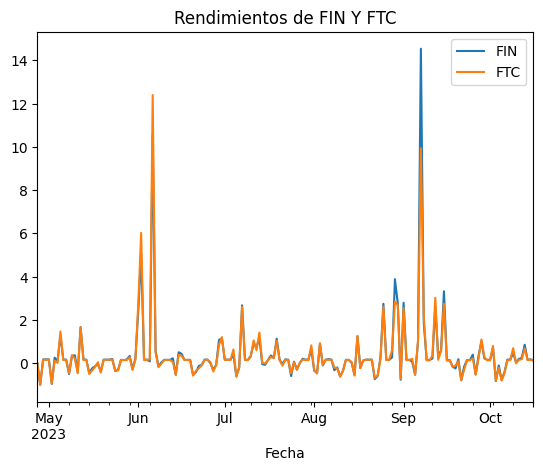

In [9]:
FIN['Rentab Diaria'].plot()
FTC['Rentab Diaria'].plot()
plt.title('Rendimientos de FIN Y FTC')
resampled_dates = pd.date_range(start=FIN.index.min(), end=FIN.index.max(), freq='M')  # Rango de fechas mensuales
plt.legend(['FIN',"FTC"])
plt.xlabel('Fecha')

In [10]:
descripcion_RENDIMIENTOSFIN = FIN['Rentab Diaria'].describe()
descripcion_RENDIMIENTOSFIN

count    173.000000
mean       0.412312
std        1.570194
min       -0.990000
25%       -0.080000
50%        0.160000
75%        0.260000
max       14.540000
Name: Rentab Diaria, dtype: float64

In [11]:
descripcion_RENDIMIENTOSFTC = FTC['Rentab Diaria'].describe()
descripcion_RENDIMIENTOSFTC

count    174.000000
mean       0.386552
std        1.443647
min       -0.990000
25%       -0.090000
50%        0.150000
75%        0.217500
max       12.400000
Name: Rentab Diaria, dtype: float64

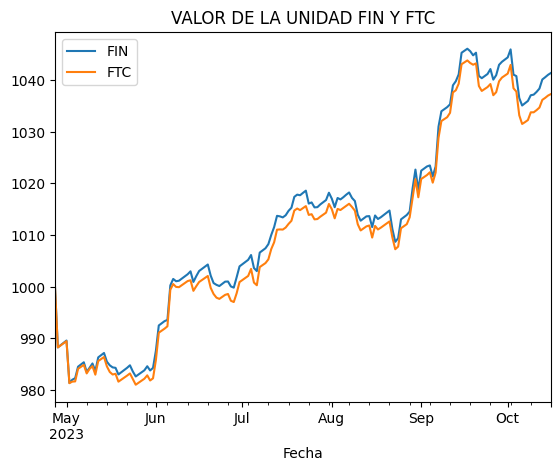

In [12]:
FIN["Valor Unidad"].plot()
FTC["Valor Unidad"].plot()
plt.title('VALOR DE LA UNIDAD FIN Y FTC')
resampled_dates = pd.date_range(start=FIN.index.min(), end=FIN.index.max(), freq='M')
plt.legend(['FIN',"FTC"])

In [13]:
descripcion_VUFIN = FIN['Valor Unidad'].describe()
descripcion_VUFIN

count     173.000000
mean     1011.952543
std        19.406721
min       981.340000
25%      1000.230000
50%      1013.440000
75%      1022.870000
max      1046.090000
Name: Valor Unidad, dtype: float64

In [14]:
descripcion_VUFTC = FTC['Valor Unidad'].describe()
descripcion_VUFTC

count     174.000000
mean     1009.930460
std        18.811235
min       980.990000
25%       998.107500
50%      1011.290000
75%      1021.135000
max      1043.820000
Name: Valor Unidad, dtype: float64

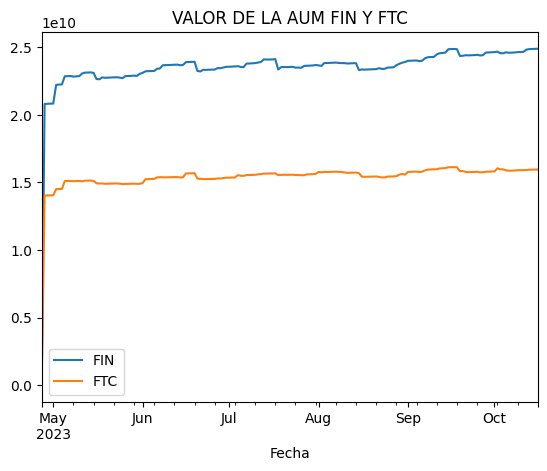

In [15]:
FIN['Valor Fondo'].plot()
FTC['Valor Fondo'].plot()
plt.title('VALOR DE LA AUM FIN Y FTC')
plt.legend(['FIN',"FTC"])

In [16]:
FIN['Valor Fondo'].apply(lambda x: "{:,.2f}".format(x).replace(",", ".").replace(".", ",")).tail()

Fecha
2023-10-12    24,826,089,865,87
2023-10-13    24,868,326,087,61
2023-10-14    24,878,688,220,98
2023-10-15    24,889,934,215,11
2023-10-16    24,898,704,460,60
Name: Valor Fondo, dtype: object

In [17]:
FTC['Valor Fondo'].apply(lambda x: "{:,.2f}".format(x).replace(",", ".").replace(".", ",")).tail()

Fecha
2023-10-12    15,918,098,357,54
2023-10-13    15,941,058,514,10
2023-10-14    15,947,122,367,23
2023-10-15    15,954,004,041,81
2023-10-16    15,958,437,077,55
Name: Valor Fondo, dtype: object

In [18]:
nivel_confianza = 0.95

In [19]:
FIN['Valor Unidad'].tail()

Fecha
2023-10-12    1038.37
2023-10-13    1040.13
2023-10-14    1040.57
2023-10-15    1041.04
2023-10-16    1041.40
Name: Valor Unidad, dtype: float64

In [20]:
FIN['Rentab Diaria'].tail()

Fecha
2023-10-12    0.26
2023-10-13    0.86
2023-10-14    0.16
2023-10-15    0.18
2023-10-16    0.14
Name: Rentab Diaria, dtype: float64

# **Retorno_FTC**

In [21]:
RETORNO_FTC_BASE = FTC['Rendimientos']

In [22]:
Retorno_FTC = FTC['Valor Fondo']*FTC['Rentab Diaria']
Retorno_FTC.head()

Fecha
2023-04-27    0.000000e+00
2023-04-28   -1.389318e+10
2023-04-29    2.246273e+09
2023-04-30    2.247185e+09
2023-05-01    2.248097e+09
dtype: float64

# **Retorno_FIN**

In [23]:
RETORNO_FIN_BASE = FIN['Rendimientos']

In [24]:
Retorno_FIN = FIN['Valor Fondo']*FIN['Rentab Diaria']
Retorno_FIN.head()

Fecha
2023-04-27    0.000000e+00
2023-04-28   -2.060431e+10
2023-04-29    3.747903e+09
2023-04-30    3.749577e+09
2023-05-01    3.751251e+09
dtype: float64

# **VaR FTC**

In [25]:
var_FTC = np.percentile(RETORNO_FTC_BASE, (1 - nivel_confianza) * 100)

In [26]:
var_formatted = "{:,.2f}".format(var_FTC).replace(",", "temp").replace(".", ",").replace("temp", ".")
print("El VaR al {}% de confianza es: {}".format(nivel_confianza * 100, var_formatted))

El VaR al 95.0% de confianza es: -36.131.244,95


In [27]:
historico_var_FTC = []
for p in range(1, 101):
    percentil = np.percentile(Retorno_FTC, p)
    historico_var_FTC.append(percentil)
print(historico_var_FTC)

[-13051357893.827076, -12528241076.153496, -11046210484.878292, -9665378808.472113, -9173525486.827003, -8742129439.104155, -8325300566.45135, -8058805790.097735, -7403880515.87488, -7149398906.187751, -6941765675.510106, -6535237419.740806, -5659568634.901989, -5282207465.363701, -4937341777.4441805, -4790603250.77064, -4643108801.041019, -4439181577.771465, -3523798350.9095473, -3272824022.9741597, -3028829899.957531, -2629955569.353912, -2545780899.1758914, -1726581941.4241202, -1375365760.258725, -1264318424.9161537, -200356715.46012688, 0.0, 293832181.8558479, 312894719.37212, 765961786.0793852, 918763548.136272, 987181085.6055586, 1685220353.6423242, 1892706518.8385742, 2127877097.4997761, 2208441616.973214, 2213715227.9962163, 2227684073.409932, 2234260457.34992, 2235060390.757267, 2235725274.214016, 2246628834.320464, 2249401108.3683443, 2265423524.5277247, 2268952493.9181, 2276023715.59134, 2307766839.6983395, 2309329824.946395, 2316280083.90375, 2332669689.0506096, 2335164962

# **VaR FIN**

In [28]:
var_FIN = np.percentile(RETORNO_FIN_BASE, (1 - nivel_confianza) * 100)

In [29]:
var_formatted = "{:,.2f}".format(var_FIN).replace(",", "temp").replace(".", ",").replace("temp", ".")
print("El VaR al {}% de confianza es: {}".format(nivel_confianza * 100, var_formatted))

El VaR al 95.0% de confianza es: -57.884.156,39


In [30]:
historico_var_FIN = []
for p in range(1, 101):
    percentil = np.percentile(Retorno_FIN, p)
    historico_var_FIN.append(percentil)
print(historico_var_FIN)

[-20274329205.86677, -19148225668.57606, -18008218523.949986, -14848737993.701027, -13971242179.830181, -13455532234.244972, -12588752953.505592, -12549024837.459908, -11951098232.182875, -10631476225.191082, -9902933692.92923, -9579282298.07888, -8481903861.756544, -8090193497.245768, -7714159677.027519, -6922842991.9584, -6604125798.488238, -5851570446.894297, -5160391439.3998, -4635556658.99952, -3721369607.99514, -3569110756.5056996, -2963048807.679631, -2435963826.15324, -1876807904.256, -1737249504.2476003, -954192374.6762719, -573967975.7642015, 205521796.92413494, 380429473.7385604, 959606026.5964801, 1689881152.352576, 2041943279.7560532, 2730484185.2797103, 3441970567.5408797, 3485518468.4718723, 3643403785.4677196, 3660467194.461728, 3669330474.43674, 3744760992.8735394, 3750447510.724752, 3762505237.348864, 3789298471.4663043, 3793012644.081344, 3809725804.33408, 3810936889.447616, 3823958533.044544, 3828689510.8067203, 3842567754.5088, 3857324210.8896003, 3869850119.268028

# **Graficos**

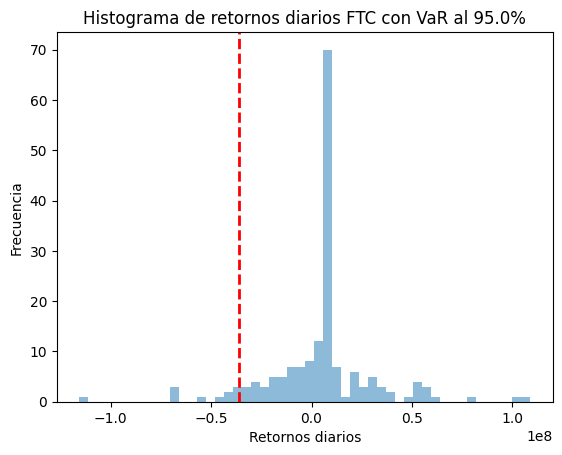

In [31]:
plt.hist(RETORNO_FTC_BASE , bins=50, alpha=0.5)
plt.axvline(x=var_FTC, color='r', linestyle='--', linewidth=2)
plt.xlabel('Retornos diarios')
plt.ylabel('Frecuencia')
plt.title('Histograma de retornos diarios FTC con VaR al {}%'.format(nivel_confianza * 100))

plt.show()

<ipython-input-32-9583f13e289f>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(RETORNO_FTC_BASE, shade=True)


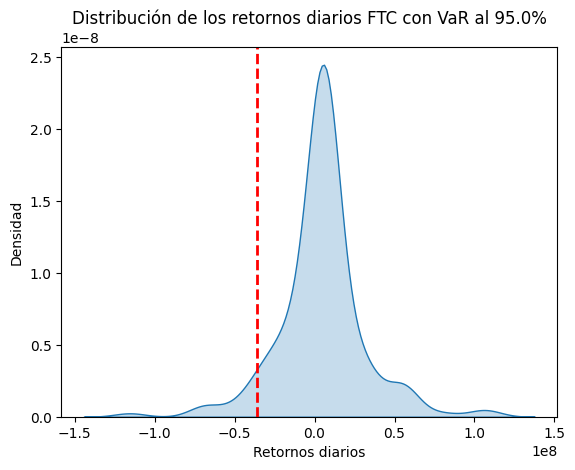

In [32]:
sns.kdeplot(RETORNO_FTC_BASE, shade=True)
plt.axvline(x=var_FTC, color='r', linestyle='--', linewidth=2)
plt.xlabel('Retornos diarios')
plt.ylabel('Densidad')
plt.title('Distribución de los retornos diarios FTC con VaR al {}%'.format(nivel_confianza * 100))
plt.show()

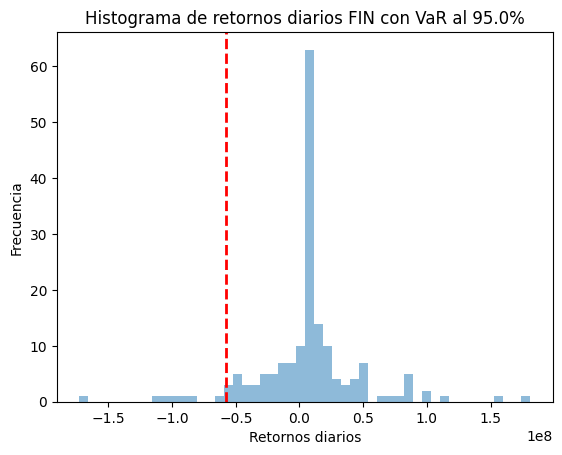

In [33]:
plt.hist(RETORNO_FIN_BASE , bins=50, alpha=0.5)
plt.axvline(x=var_FIN, color='r', linestyle='--', linewidth=2)
plt.xlabel('Retornos diarios')
plt.ylabel('Frecuencia')
plt.title('Histograma de retornos diarios FIN con VaR al {}%'.format(nivel_confianza * 100))

plt.show()

<ipython-input-34-74d80ddc373e>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(RETORNO_FIN_BASE, shade=True)


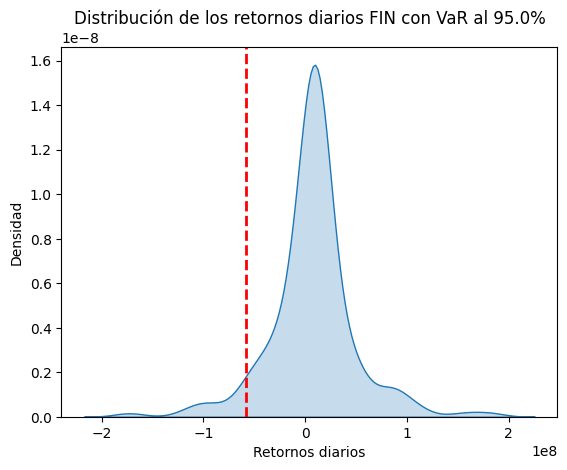

In [34]:
sns.kdeplot(RETORNO_FIN_BASE, shade=True)
plt.axvline(x=var_FIN, color='r', linestyle='--', linewidth=2)
plt.xlabel('Retornos diarios')
plt.ylabel('Densidad')
plt.title('Distribución de los retornos diarios FIN con VaR al {}%'.format(nivel_confianza * 100))
plt.show()

<ipython-input-35-f5b2386f87a6>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(RETORNO_FTC_BASE, shade=True,label='Retorno FTC')
<ipython-input-35-f5b2386f87a6>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(RETORNO_FIN_BASE, shade=True,label='Retorno FIN')


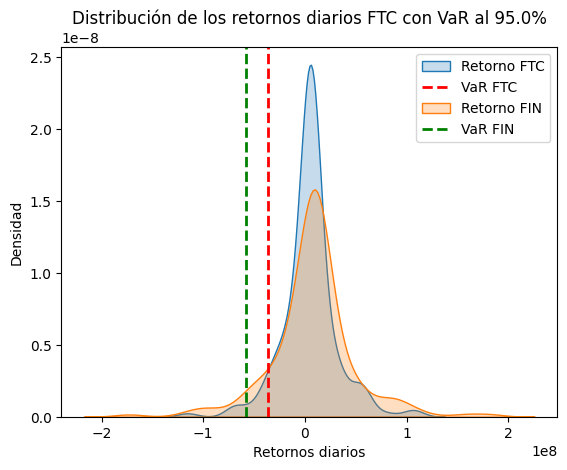

In [35]:
# Gráfico 1 - Retorno_FTC
sns.kdeplot(RETORNO_FTC_BASE, shade=True,label='Retorno FTC')
plt.axvline(x=var_FTC, color='r', linestyle='--', linewidth=2,label='VaR FTC')
plt.xlabel('Retornos diarios')
plt.ylabel('Densidad')
plt.title('Distribución de los retornos diarios FTC con VaR al {}%'.format(nivel_confianza * 100))
# Gráfico 2 - Retorno_FIN
sns.kdeplot(RETORNO_FIN_BASE, shade=True,label='Retorno FIN')
plt.axvline(x=var_FIN, color='g', linestyle='--', linewidth=2,label='VaR FIN')
plt.xlabel('Retornos diarios')
plt.ylabel('Densidad')
plt.legend()
plt.show()

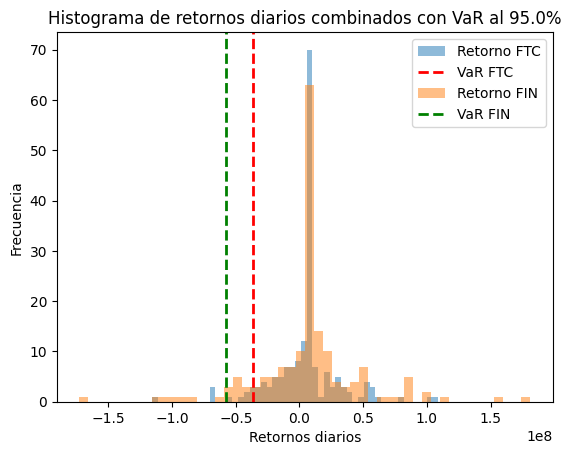

In [36]:
plt.hist(RETORNO_FTC_BASE , bins=50, alpha=0.5,label='Retorno FTC')
plt.axvline(x=var_FTC, color='r', linestyle='--', linewidth=2 ,label='VaR FTC')
plt.xlabel('Retornos diarios')
plt.ylabel('Frecuencia')
plt.title('Histograma de retornos diarios FTC con VaR al {}%'.format(nivel_confianza * 100))
# Gráfico 2 - Retorno_FIN
plt.hist(RETORNO_FIN_BASE , bins=50, alpha=0.5,label='Retorno FIN')
plt.axvline(x=var_FIN, color='g', linestyle='--', linewidth=2, label='VaR FIN')
plt.xlabel('Retornos diarios')
plt.ylabel('Frecuencia')
plt.title('Histograma de retornos diarios combinados con VaR al {}%'.format(nivel_confianza * 100))
plt.legend()
# Mostrar los gráficos combinados
plt.show()

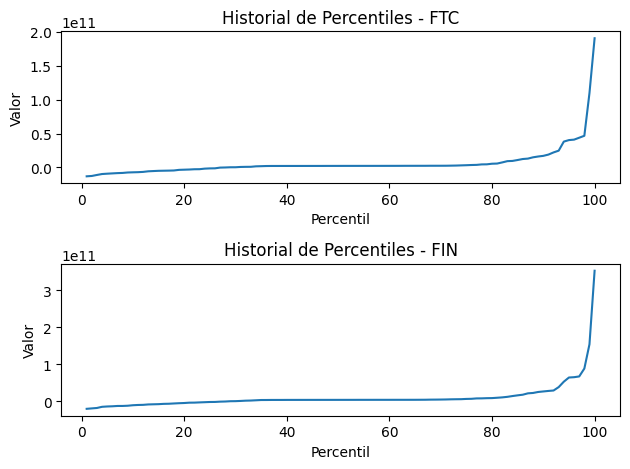

In [37]:
x = np.arange(1, 101)
# Gráfico 1
plt.subplot(2, 1, 1)
plt.plot(x, historico_var_FTC)
plt.xlabel('Percentil')
plt.ylabel('Valor')
plt.title('Historial de Percentiles - FTC')
# Gráfico 2
plt.subplot(2, 1, 2)
plt.plot(x, historico_var_FIN)
plt.xlabel('Percentil')
plt.ylabel('Valor')
plt.title('Historial de Percentiles - FIN')
# Ajustar los márgenes para evitar superposiciones de etiquetas
plt.tight_layout()
# Mostrar los gráficos
plt.show()

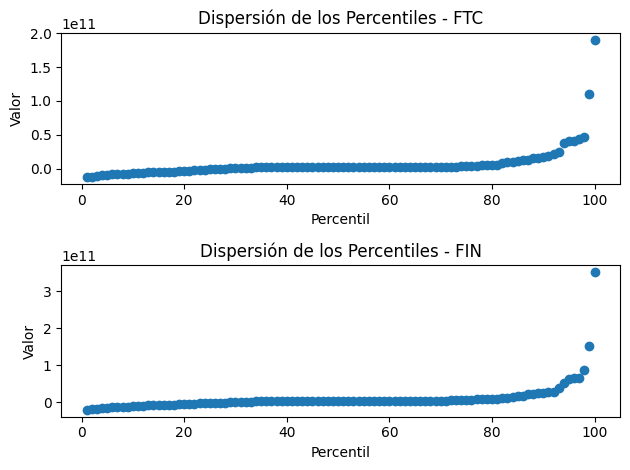

In [38]:
x = range(1, 101)
# Gráfico 1
plt.subplot(2, 1, 1)
plt.scatter(x, historico_var_FTC)
plt.xlabel('Percentil')
plt.ylabel('Valor')
plt.title('Dispersión de los Percentiles - FTC')
# Gráfico 2
plt.subplot(2, 1, 2)
plt.scatter(x, historico_var_FIN)
plt.xlabel('Percentil')
plt.ylabel('Valor')
plt.title('Dispersión de los Percentiles - FIN')

# Ajustar los márgenes para evitar superposiciones de etiquetas
plt.tight_layout()

# **Composición Dinamica**

In [ ]:
from google.colab import files
# Subir múltiples archivos
uploaded = files.upload()

In [ ]:
FIN = pd.read_excel("/content/FIN Formato portafolio diario para envío.xlsx")

In [ ]:
FIN.head()

In [ ]:
Composicion = pd.pivot_table(FIN, values='Valor Presente', index='Fecha', columns='Tasa Indexada', aggfunc=np.sum, margins=True, margins_name='Total') \
    .rename(columns={'NO': 'Acciones', 'No Tiene': 'Liquidez'}) \
    .drop(index=['Total']) \
    .style.format('{:,.2f}'.format)

In [ ]:
Composicion = Composicion.data
Composicion.fillna(0, inplace=True)
corr_matrix=Composicion.corr()

In [ ]:
Composicion_tail=Composicion.tail()

In [ ]:
Composicion_tail.style.format('{:,.2f}'.format)

In [ ]:
colors = ['#1B5E20', '#388E3C', '#4CAF50']
cmap = ListedColormap(colors)
sns.heatmap(corr_matrix,cmap=cmap, annot=True)
plt.show()

In [ ]:
# Calcular la columna de porcentajes
porcentajes = Composicion.div(Composicion.iloc[:,-1], axis=0).iloc[:,:-1]
porcentajes.columns = [str(col) for col in porcentajes.columns]
# Agregar la columna de porcentajes al DataFrame
Composicion= pd.concat([Composicion, porcentajes], axis=0)

In [ ]:
Composicion = Composicion.drop("Total", axis=1)
Composicion.tail()

In [ ]:
# Crear el gráfico de áreas apiladas al 100%
ax = porcentajes.plot(kind='area', stacked=True, figsize=(10, 5), legend=True, ylim=[0, 1], y=['Liquidez','Acciones',"FS","IB1","IPC"])

# Configurar el título y etiquetas de los ejes
ax.set_title('Composición del portafolio')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor Presente')

# Mostrar la leyenda del gráfico
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Mostrar el gráfico
plt.show()

In [ ]:
# Crear el gráfico de áreas apiladas al 100%
ax = porcentajes.plot(kind='barh', stacked=True, figsize=(10, 9), legend=True, ylim=[0, 1], y=['Liquidez','Acciones',"FS","IB1","IPC"])
# Configurar el título y etiquetas de los ejes
ax.set_title('Composición del portafolio')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor Presente')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
# Mostrar la leyenda del gráfico
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Mostrar el gráfico
plt.show()